<a href="https://colab.research.google.com/github/NavneetSajwan/Human-Gait-Classification-with-EMG/blob/master/Gait_classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing data and useful resources**

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from fastai import *
from fastai.vision import *
from tqdm import tqdm_notebook

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [0]:
# os.mkdir('/content/drive/My Drive/fastai-v3/data/EMG')

In [0]:
!unzip -q '/content/drive/My Drive/Gait data.zip'

In [0]:
path = Path.cwd()

In [0]:
path_data = path/'Gait data'
path_data.ls()

[PosixPath('/content/Gait data/SD'),
 PosixPath('/content/Gait data/SA'),
 PosixPath('/content/Gait data/RD'),
 PosixPath('/content/Gait data/LG'),
 PosixPath('/content/Gait data/RA')]

**Taking Fourier of EMG data**

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


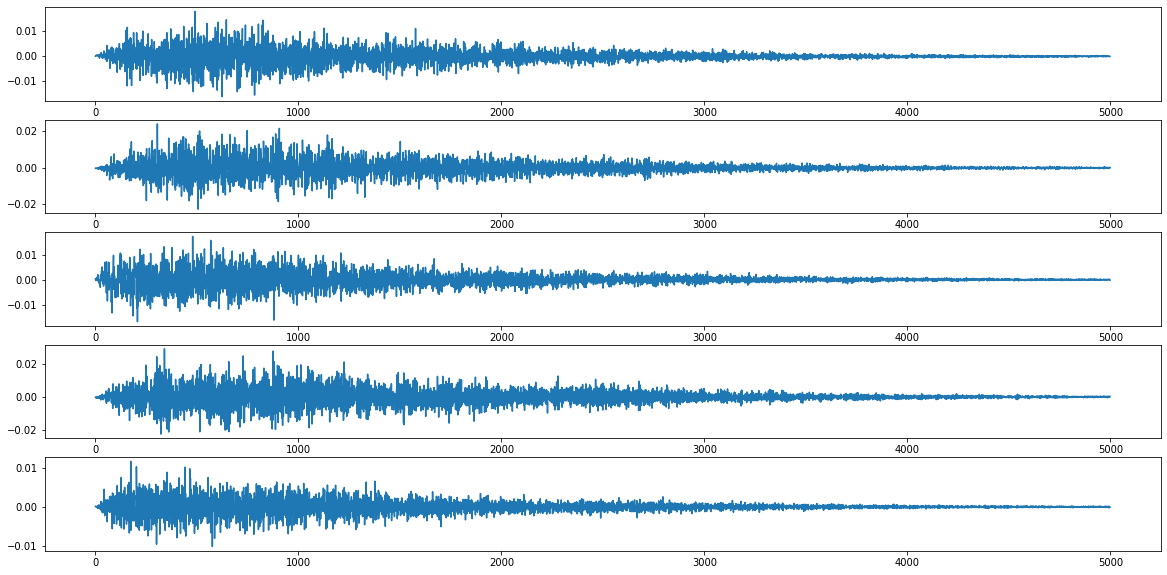

In [0]:
path_lg, path_ra, path_rd, path_sa, path_sd = path_data/'LG',  path_data/'RA', path_data/'RD',  path_data/'SA', path_data/'SD'

lg, ra, rd, sa, sd = path_lg.ls()[0], path_ra.ls()[0],path_rd.ls()[0], path_sa.ls()[0],path_sd.ls()[0]
lgdf, radf, rddf, sadf, sddf,   = pd.read_csv(lg), pd.read_csv(ra), pd.read_csv(rd), pd.read_csv(sa), pd.read_csv(sd)

emg_array1 = lgdf.iloc[4000:20000,1].values
emg_array2 = radf.iloc[4000:20000,1].values

emg_array3 = rddf.iloc[4000:20000,1].values
emg_array4 = sadf.iloc[4000:20000,1].values

emg_array5 = sddf.iloc[4000:20000,1].values

ft1 = np.fft.fft(emg_array1)
ft2 = np.fft.fft(emg_array2)

ft3 = np.fft.fft(emg_array3)
ft4 = np.fft.fft(emg_array4)

ft5 = np.fft.fft(emg_array5)

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, figsize=(20,10))
ax1.plot(ft1[1:5000])
ax2.plot(ft2[1:5000])

ax3.plot(ft3[1:5000])
ax4.plot(ft4[1:5000])

ax5.plot(ft5[1:5000])

**Plotter Function**

In [0]:
def plotter(x, y, z, i):
  fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (7, 7))
  axes = [ax1,ax2,ax3]
  data = [x, y, z]
  color = ['r', 'g', 'b']
  
  for ax, dat, c in zip(axes, data, color):
    ax.plot(dat, c )
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

  fig.savefig(path_clas/'{}.jpg'.format(i), bbox_inches = 'tight' )
  plt.close(fig)

**Initial Testing a single data file**

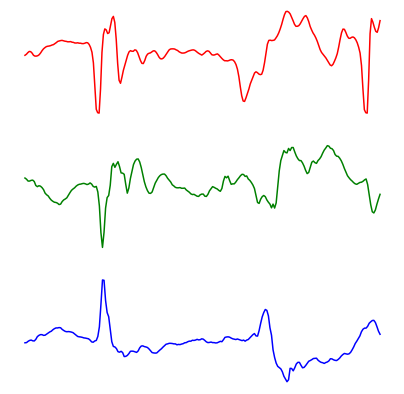

In [0]:
path_clas = path_data/'LG'
temp = path_clas.ls()[0]
df = pd.read_csv(temp)
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (7, 7))
x, y, z = df.iloc[620:870,3].values, df.iloc[620:850,5].values, df.iloc[620:850,7].values
axes = [ax1,ax2,ax3]
data = [x, y, z]
color = ['r', 'g', 'b']
# print(type(ax1))
for ax, dat, c in zip(axes, data, color):
  ax.plot(dat, c )
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.set_xticks([])
  ax.set_yticks([])


fig.savefig('0.jpg', bbox_inches = 'tight' )

**Array Generator Block**

In [0]:
X, Y, Z = (np.array([]),)*3
folders  = ['LG','RA','RD','SA','SD']
for clas in folders:
  path_clas = path_data/clas
  files = path_clas.ls()
  # print(files)
  initial, final = 0, 0
  for file in files:
      df = pd.read_csv(file)
      df = df.loc[df['Trigno sensor 1: Acc 1.X [g]'].notnull()]
      # print(len(df))
      for i in range(600, len(df), 50): 
        initial = i
        final = i + 250
        # print(len(X))
        if len(df) > final:
           X = np.append(X, df.iloc[initial:final, 3].values)
           Y = np.append(Y, df.iloc[initial:final, 5].values)
           Z = np.append(Z, df.iloc[initial:final, 7].values)
 

In [0]:
X, Y, Z= X.reshape(-1,250), Y.reshape(-1,250), Z.reshape(-1,250)
print(X.shape, Y.shape, Z.shape)

(1000, 250) (1000, 250) (1000, 250)


In [0]:
n_classes = 5
points_per_class = X.shape[0]//n_classes
points_per_class

200

In [0]:
# !rm -rf '/content/data'/

In [0]:
os.mkdir('/content/data')
os.mkdir('/content/data/LG')
os.mkdir('/content/data/RA')
os.mkdir('/content/data/RD')
os.mkdir('/content/data/SA')
os.mkdir('/content/data/SD')

**Plot Generator Block**

In [0]:
path = Path('/content/data')
folders  = ['LG','RA','RD','SA','SD']
for count, clas in enumerate(folders):
  path_clas = path/clas
  for i in tqdm_notebook(range(count*points_per_class, (count+1)*points_per_class), total = points_per_class, unit = 'plot'):
    plotter(X[i], Y[i], Z[i], i)

# **Creating the Model**

In [0]:
np.random.seed(0)
path = Path('/content/data')
data = (ImageList.from_folder(path)
        .split_by_rand_pct(0.20)
        .label_from_folder()
        .databunch(bs = 128)
        .normalize(imagenet_stats))

In [0]:
data.classes

['LG', 'RA', 'RD', 'SA', 'SD']

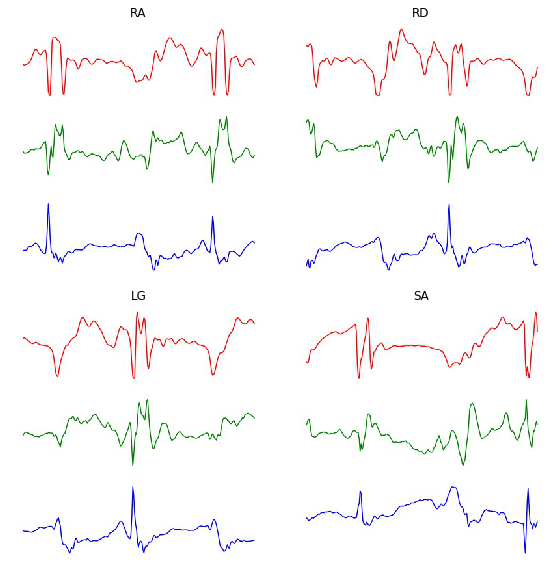

In [0]:
data.show_batch(2)

In [0]:
learn = cnn_learner(data, models.resnet18, pretrained = True,  metrics = accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.45E-03
Min loss divided by 10: 3.02E-02


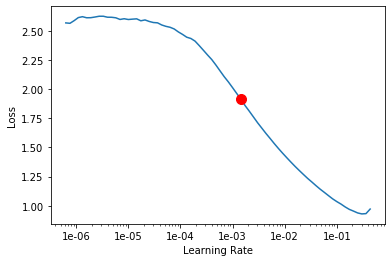

In [0]:
# learn.freeze()
learn.lr_find()
learn.recorder.plot(suggestion = True)

In [0]:
lr = 1.7e-3
learn.fit_one_cycle(4, slice(1e-4, 1e-3,1e-2) )

epoch,train_loss,valid_loss,accuracy,time
0,0.052933,0.116763,0.970000,00:06
1,0.042832,0.104596,0.970000,00:06
2,0.039713,0.098390,0.970000,00:06
3,0.034996,0.098403,0.970000,00:06


In [0]:
# os.mkdir('/content/drive/My Drive/fastai-v3/data/EMG/models')
path_model = Path('/content/drive/My Drive/fastai-v3/data/EMG/models')
# learn.save(path_model/'stage-1')

In [0]:
learn.load(path_model/'stage-1')

In [0]:
learn.save(path_model/'stage-600-50')

In [0]:
learn.load(path_model/'stage-600-50')

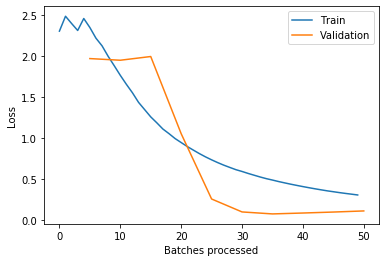

In [0]:
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.59E-07
Min loss divided by 10: 4.79E-05


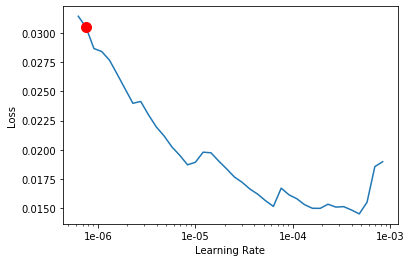

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion = True)

In [0]:
lr = 3e-7
learn.fit_one_cycle(10, slice(1e-5, 1e-04) )

epoch,train_loss,valid_loss,accuracy,time
0,0.008699,1.097317,0.550000,00:01
1,0.014514,1.095165,0.525000,00:01
2,0.012942,1.089347,0.525000,00:01
3,0.013653,1.099376,0.500000,00:01
4,0.013763,1.092395,0.525000,00:01
5,0.013274,1.086940,0.525000,00:01
6,0.013371,1.080003,0.500000,00:01
7,0.012093,1.077271,0.525000,00:01
8,0.011662,1.074956,0.525000,00:01
9,0.012257,1.081590,0.525000,00:01


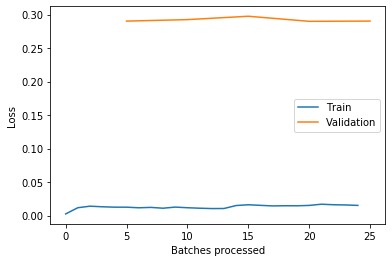

In [0]:
learn.recorder.plot_losses()

In [0]:
interp=  ClassificationInterpretation.from_learner(learn)

In [0]:
interp.most_confused()

[('RA', 'RD', 3), ('LG', 'RD', 2), ('RD', 'RA', 1)]

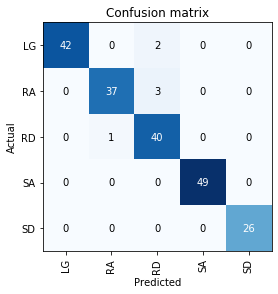

In [0]:
interp.plot_confusion_matrix()